In [1]:
# https://keras.io/guides/keras_cv/generate_images_with_stable_diffusion/

import time
import keras_cv
import tensorflow as tf
import matplotlib.pyplot as plt
    
model = keras_cv.models.StableDiffusion(img_width=512, img_height=512, jit_compile=True)

C:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


By using this model checkpoint, you acknowledge that its usage is subject to the terms of the CreativeML Open RAIL-M license at https://raw.githubusercontent.com/CompVis/stable-diffusion/main/LICENSE


10/10 [==============================] - 127s 8s/step
None


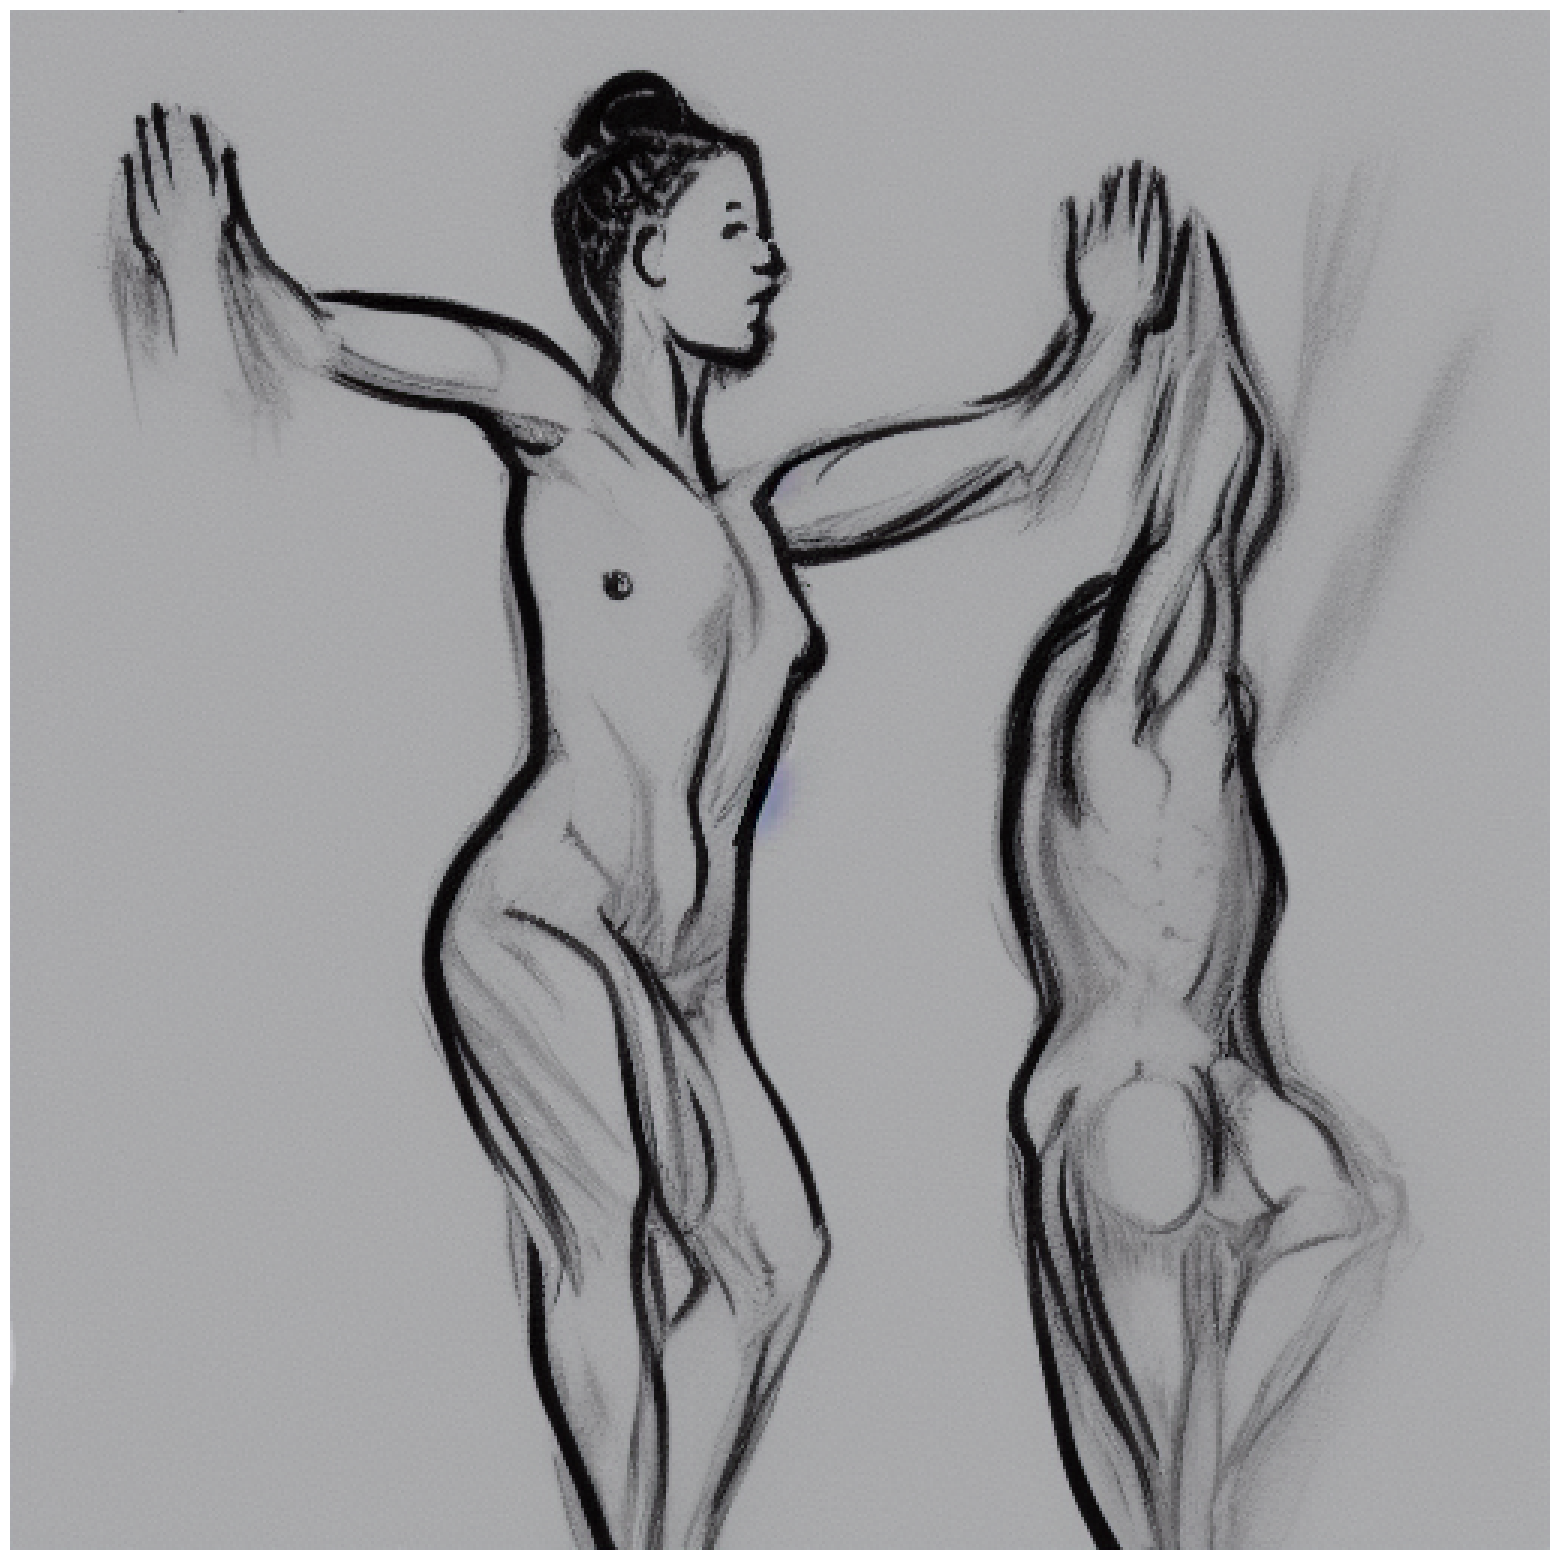

In [2]:
images = model.text_to_image(
    prompt="Naked woman doing jumping jacks sketch.",
    batch_size=1,  # How many images to generate at once
    num_steps=10,  # Number of iterations (controls image quality)
    seed=123,  # Set this to always get the same image from the same prompt
)


def plot_images(images):
    plt.figure(figsize=(20, 20))
    for i in range(len(images)):
        ax = plt.subplot(1, len(images), i + 1)
        plt.imshow(images[i])
        plt.axis("off")


print(plot_images(images))

In [3]:
# # https://iask.ai/
# # What AI model do I need to generate an image based on text. It needs to be free. It needs to run on slow pc. 
# # It needs to run locally. Not clip or GPT or DALLE. The image needs to look like a sketch. Not Sketch-RNN. 
# # Give me a website on how to use it. It needs to run on a python notebook. It needs to be pre-trained.

# # Out of memory!

# import torch
# from dalle2_pytorch import DALLE2, DiffusionPriorNetwork, DiffusionPrior, Unet, Decoder, OpenAIClipAdapter

# clip = OpenAIClipAdapter()

# # mock data

# text = torch.randint(0, 49408, (4, 256)).cuda()
# images = torch.randn(4, 3, 256, 256).cuda()

# # prior networks (with transformer)

# prior_network = DiffusionPriorNetwork(
#     dim = 512,
#     depth = 6,
#     dim_head = 64,
#     heads = 8
# ).cuda()

# diffusion_prior = DiffusionPrior(
#     net = prior_network,
#     clip = clip,
#     timesteps = 100,
#     cond_drop_prob = 0.2
# ).cuda()

# loss = diffusion_prior(text, images)
# loss.backward()

# # do above for many steps ...

# # decoder (with unet)

# unet1 = Unet(
#     dim = 128,
#     image_embed_dim = 512,
#     cond_dim = 128,
#     channels = 3,
#     dim_mults=(1, 2, 4, 8),
#     text_embed_dim = 512,
#     cond_on_text_encodings = True  # set to True for any unets that need to be conditioned on text encodings (ex. first unet in cascade)
# ).cuda()

# unet2 = Unet(
#     dim = 16,
#     image_embed_dim = 512,
#     cond_dim = 128,
#     channels = 3,
#     dim_mults = (1, 2, 4, 8, 16)
# ).cuda()

# decoder = Decoder(
#     unet = (unet1, unet2),
#     image_sizes = (128, 256),
#     clip = clip,
#     timesteps = 1000,
#     sample_timesteps = (250, 27),
#     image_cond_drop_prob = 0.1,
#     text_cond_drop_prob = 0.5
# ).cuda()

# for unet_number in (1, 2):
#     loss = decoder(images, text = text, unet_number = unet_number) # this can optionally be decoder(images, text) if you wish to condition on the text encodings as well, though it was hinted in the paper it didn't do much
#     loss.backward()

# # do above for many steps

# dalle2 = DALLE2(
#     prior = diffusion_prior,
#     decoder = decoder
# )

# images = dalle2(
#     ['a butterfly trying to escape a tornado'],
#     cond_scale = 2. # classifier free guidance strength (> 1 would strengthen the condition)
# )

# # save your image (in this example, of size 256x256)

In [4]:
# from torchvision.transforms import ToPILImage

# print(images.shape)

# for img in images:
#     img = ToPILImage()(img)
#     img.show()